In [9]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

In [10]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [21]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-6, 10, num=nb_of_x)
    x2s = np.linspace(-6, 10, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
#d = 2  # number of dimensions

# Plot of independent Normals
#bivariate_mean = np.matrix([[0.], [0.]])  # Mean
#bivariate_covariance = np.matrix([
#    [1., 0.], 
#    [0., 1.]])  # Covariance
#x1, x2, p = generate_surface(
#    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
#con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#ax1.set_xlabel('$x_1$', fontsize=13)
#ax1.set_ylabel('$x_2$', fontsize=13)
#ax1.axis([-2.5, 2.5, -2.5, 2.5])
#ax1.set_aspect('equal')
#ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
#bivariate_mean = np.matrix([[0.], [1.]])  # Mean
#bivariate_covariance = np.matrix([
#    [1., 0.8], 
#    [0.8, 1.]])  # Covariance
#x1, x2, p = generate_surface(
#    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
#con = ax2.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#ax2.set_xlabel('$x_1$', fontsize=13)
#ax2.set_ylabel('$x_2$', fontsize=13)
#ax2.axis([-2.5, 2.5, -1.5, 3.5])
#ax2.set_aspect('equal')
#ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#cbar = fig.colorbar(con, cax=cbar_ax)
#cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
#plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
#plt.show()
#

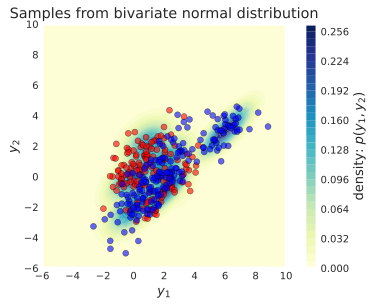

In [24]:
# Sample from:
d = 2 # Number of dimensions per Gaussian
# Define the mean for each Gaussian in Class1
mean11 = np.matrix([[2.], [-1.]])
mean12 = np.matrix([[0.], [0.]])
mean13 = np.matrix([[1.], [2.]])
# Define the mean for each Gaussian in Class2
mean21 = np.matrix([[2.], [0.]])
mean22 = np.matrix([[2.], [1.]])
mean23 = np.matrix([[6.], [3.]])
mean24 = np.matrix([[0.], [-2.]])
# Define the covarience for each Gaussian in Class1
covariance11 = np.matrix([
[1, 0.8],
[0.8, 1]
])
covariance12 = np.matrix([
[1, 0.6],
[0.6, 1]
])
covariance13 = np.matrix([
[1, 0.3],
[0.3, 1]
])
# Define the covarience for each Gaussian in Class2
covariance21 = np.matrix([
[1, 0.2],
[0.2, 1]
])
covariance22 = np.matrix([
[1, 0.5],
[0.5, 1]
])
covariance23 = np.matrix([
[1, 0.8],
[0.8, 1]
])
covariance24 = np.matrix([
[1, 0.6],
[0.6, 1]
])
# Create L for each Gaussian and concatenate in Class 1
L11 = np.linalg.cholesky(covariance11)
L12 = np.linalg.cholesky(covariance12)
L13 = np.linalg.cholesky(covariance13)
# Create L for each Gaussian and concatenate in Class 2
L21 = np.linalg.cholesky(covariance21)
L22 = np.linalg.cholesky(covariance22)
L23 = np.linalg.cholesky(covariance23)
L24 = np.linalg.cholesky(covariance24)
#-----------------------------Class 1--------------------------
# Sample X from standard normal for Class 1
n = 50 # Samples to draw
X11 = np.random.normal(size=(d, n))
X12 = np.random.normal(size=(d, n))
X13 = np.random.normal(size=(d, n))
# Apply the transformation
Y11 = L11.dot(X11) + mean11
Y12 = L12.dot(X12) + mean12
Y13 = L13.dot(X13) + mean13
#Create Y and append the values for Class 1
Y11 = np.array(Y11)
Y12 = np.array(Y12)
Y13 = np.array(Y13)
Y1 = np.concatenate((Y11,Y12,Y13))
# Plot the samples and the distribution for CLass 1
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution for Class 1
x11, x12, p11 = generate_surface(mean11, covariance11, d) # Call this multiple times
x13, x14, p12 = generate_surface(mean12, covariance12, d)
x15, x16, p13 = generate_surface(mean13, covariance13, d)
x11 = np.array(x11)
x12 = np.array(x12)
x13 = np.array(x13)
x14 = np.array(x14)
x15 = np.array(x15)
x16 = np.array(x16)

X11 = np.concatenate((x11,x13,x15))
X12 = np.concatenate((x12,x14,x16))

p11 = np.array(p11)
p12 = np.array(p12)
p13 = np.array(p13)
p1 = np.concatenate((p11,p12,p13))

#-----------------------------Class 2--------------------------
# Sample X from standard normal for Class 2
X21 = np.random.normal(size=(d, n))
X22 = np.random.normal(size=(d, n))
X23 = np.random.normal(size=(d, n))
X24 = np.random.normal(size=(d, n))
# Apply the transformation
Y21 = L11.dot(X21) + mean21
Y22 = L12.dot(X22) + mean22
Y23 = L13.dot(X23) + mean23
Y24 = L13.dot(X24) + mean24
#Create Y and append the values for Class 2
Y21 = np.array(Y21)
Y22 = np.array(Y22)
Y23 = np.array(Y23)
Y24 = np.array(Y24)
Y2 = np.concatenate((Y21,Y22,Y23,Y24))
# Plot the samples and the distribution for CLass 2
#fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution for Class 2
x21, x22, p21 = generate_surface(mean21, covariance21, d) # Call this multiple times
x23, x24, p22 = generate_surface(mean22, covariance22, d)
x25, x26, p23 = generate_surface(mean23, covariance23, d)
x27, x28, p24 = generate_surface(mean24, covariance24, d)

x21 = np.array(x21)
x22 = np.array(x22)
x23 = np.array(x23)
x24 = np.array(x24)
x25 = np.array(x25)
x26 = np.array(x26)
x27 = np.array(x27)
x28 = np.array(x28)

X21 = np.concatenate((x11,x13,x15,x21,x23,x25,x27))
X22 = np.concatenate((x12,x14,x16,x22,x24,x26,x28))

p21 = np.array(p21)
p22 = np.array(p22)
p23 = np.array(p23)
p24 = np.array(p24)
p2 = np.concatenate((p11,p12,p13,p21,p22,p23,p24))

# Plot All samples
#----------------------------------------------------
#con = ax.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
#con = ax.contourf(X11, X12, p1, 33, cmap=cm.YlGnBu)
con = ax.contourf(X21, X22, p2, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y1[0,:], Y1[1,:],'ro', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y1[2,:], Y1[3,:],'ro', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y1[4,:], Y1[5,:],'ro', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y2[0,:], Y2[1,:],'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y2[2,:], Y2[3,:],'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y2[4,:], Y2[5,:],'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.plot(Y2[6,:], Y2[7,:],'bo', alpha=.6, markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
#ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.axis([-6, 10, -6, 10])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#
